In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./insurance.csv")
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
X = df[['age' , 'sex' , 'bmi' , 'children' , 'smoker', 'region']].values
y = df['charges'].values
print("Dataset size :" , X.shape[0])

Dataset size : 1338


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [17]:
from sklearn.preprocessing import OneHotEncoder 

ohe_sex = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_smoker = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_region = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

df_sex = ohe_sex.fit_transform(df[['sex']])
df_smoker = ohe_smoker.fit_transform(df[['smoker']])
df_region = ohe_region.fit_transform(df[['region']])


In [20]:
X_final = df[['age', 'bmi', 'children']].values  # Add .values here!
X_final = np.hstack([X_final, df_sex, df_smoker, df_region])

In [21]:
num_features = ['age', 'bmi', 'children']

sex_features = ohe_sex.get_feature_names_out(['sex'])
smoker_features = ohe_smoker.get_feature_names_out(['smoker'])
region_features = ohe_region.get_feature_names_out(['region'])

feature_names = np.concatenate(
    [num_features, sex_features, smoker_features, region_features]
)

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size = 0.2 , random_state = 42)
print("Train set size :" , X_train.shape[0])
print("Test set size :" , X_test.shape[0])

Train set size : 1070
Test set size : 268


In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 30 , min_samples_leaf = 20 , random_state = 42)
tree_reg.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=20, random_state=42)

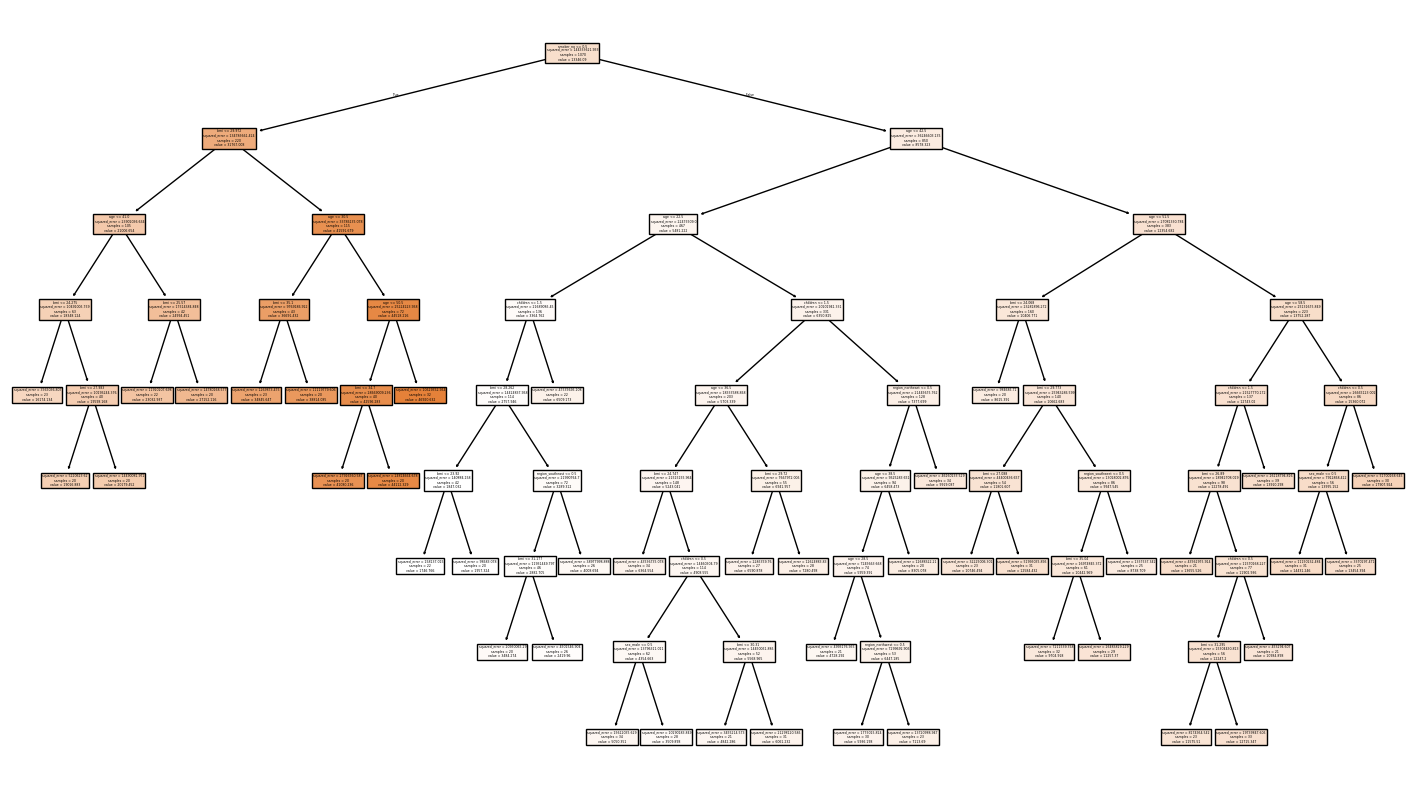

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(tree_reg, 
feature_names =feature_names, 
          filled=True)
plt.show()


In [45]:
Medical_output = tree_reg.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test , Medical_output)
print("mse: ", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, Medical_output)
print("R² Score:", r2)

rmse = mean_squared_error(y_test, Medical_output, squared=False)
print("RMSE:", rmse)

mse:  20976585.237871528
R² Score: 0.8648840152424495
RMSE: 4580.020222430413


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
